
Temperature: 21.7 C
Pressure:999.8 hPa
Altitude = 112.37 meters

Temperature: 21.7 C
Pressure:999.8 hPa
Altitude = 112.71 meters

Temperature: 21.7 C
Pressure:999.8 hPa
Altitude = 112.80 meters

Temperature: 21.7 C
Pressure:999.8 hPa
Altitude = 112.41 meters

Temperature: 21.7 C
Pressure:999.8 hPa
Altitude = 112.47 meters

Temperature: 21.7 C
Pressure:999.8 hPa
Altitude = 112.50 meters

Temperature: 21.7 C
Pressure:999.8 hPa
Altitude = 112.60 meters

Temperature: 21.7 C
Pressure:999.8 hPa
Altitude = 112.90 meters

Temperature: 21.7 C
Pressure:999.8 hPa
Altitude = 112.88 meters

Temperature: 21.7 C
Pressure:999.8 hPa
Altitude = 112.68 meters

Temperature: 21.7 C
Pressure:999.8 hPa
Altitude = 112.44 meters

Temperature: 21.7 C
Pressure:999.8 hPa
Altitude = 112.58 meters

Temperature: 21.7 C
Pressure:999.8 hPa
Altitude = 112.56 meters

Temperature: 21.7 C
Pressure:999.8 hPa
Altitude = 112.91 meters

Temperature: 21.7 C
Pressure:999.8 hPa
Altitude = 112.86 meters

Temperature: 21.7 C
Pres

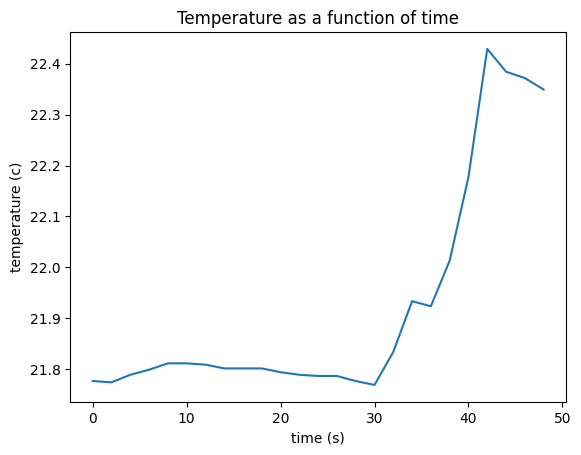

In [2]:
#requires installing adafruit-circuitpython-bmp280 library and gpiozero; implementation of plotting to be added

from time import sleep
import board
import adafruit_bmp280
from gpiozero import Motor
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime

i2c = board.I2C()
bmp280 = adafruit_bmp280.Adafruit_BMP280_I2C(i2c,address=0x76)
mot = Motor(forward = 18, backward = 19, enable = 17, pwm = True)
logs=[]
x=[]
y=[]

bmp280.sea_level_pressure = 1013.25

def get_temp():
    try:
        return bmp280.temperature
    except OSError:
        print("Sensor glitch")
        sleep(.1)
        return None

def loop():
    count = 0
    while True:
        print("\nTemperature: %0.1f C"%bmp280.temperature)
        print("Pressure:%0.1f hPa" % bmp280.pressure)
        print("Altitude = %0.2f meters" % bmp280.altitude)
        if bmp280.temperature > 30:
            mot.forward(1)
        elif bmp280.temperature >25:
            mot.forward(.8)
        elif bmp280.temperature > 20:
            mot.forward(1)
            sleep(.2)
            mot.forward(.5)
        else:
            mot.forward(0)
        temp = get_temp()
        if temp is None:
            continue
        y.append(temp)
        x.append(count)
        timestamp = datetime.now().strftime("%H:%M:%S")
        logs.append({
            "Timestamp": timestamp,
            "Temperature (C)": temp,
            "Pressure (hPa)": bmp280.pressure
        })
        sleep(2)
        count+=2

if __name__ == "__main__":
    try:
        loop()
    except KeyboardInterrupt:
        print("Stop system and exporting data")
        if logs:
            df = pd.DataFrame(logs)
            df.to_excel("barometric_fan_readings.xlsx", index=False)
        else:
            print("Failed to export")
        plt.plot(x,y)
        plt.xlabel("time (s)")
        plt.ylabel("temperature (c)")
        plt.title("Temperature as a function of time")
        plt.show()
        i2c.deinit()
        mot.close()